<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/CurrentSquad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-dateutil

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import datetime, date
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-2-db3af1e1316c>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [3]:
# Importing and displaying the last 10 goals scored:
df = pd.ExcelFile('INTER.xlsx')
squad = pd.read_excel(df, 'Full squad')
squad.tail(10)

,Number,Position,Nationality,Player,Contract until,Date of birth
32,—,FW,Italy,Sebastiano Esposito,2025-06-30,2002-07-02
33,—,FW,Italy,Gaetano Oristanio,NaT,2002-09-28
34,—,FW,Italy,Eddie Salcedo,NaT,2001-10-01
35,—,FW,Uruguay,Martín Satriano,2027-06-30,2001-02-20
36,—,FW,Poland,Jan Żuberek,NaT,2004-03-13
37,—,GK,Serbia,Filip Stanković,2024-06-30,2002-02-25
38,—,GK,Italy,William Rovida,2025-06-30,2003-03-14
39,NaN,MF,Poland,Piotr Zieliński,2028-06-30,1994-05-20
40,NaN,FW,Iran,Mehdi Taremi,2026-06-30,1992-07-18
41,NaN,GK,Spain,Josep Martínez,2029-06-30,1998-05-27


In [4]:
# Displaying statistical data of the numerical data present in the dataset:
squad.describe()

,Contract until,Date of birth
count,35,42
mean,2026-10-12 13:01:42.857142784,1998-06-06 13:08:34.285714304
min,2024-06-30 00:00:00,1988-02-10 00:00:00
25%,2025-06-30 00:00:00,1995-01-08 06:00:00
50%,2026-06-30 00:00:00,1999-03-12 00:00:00
75%,2027-12-30 00:00:00,2002-08-13 00:00:00
max,2029-06-30 00:00:00,2005-06-28 00:00:00


In [5]:
# Displaying the number of rows and columns in the dataset:
squad.shape

(42, 6)

# **Plotting basic column data**

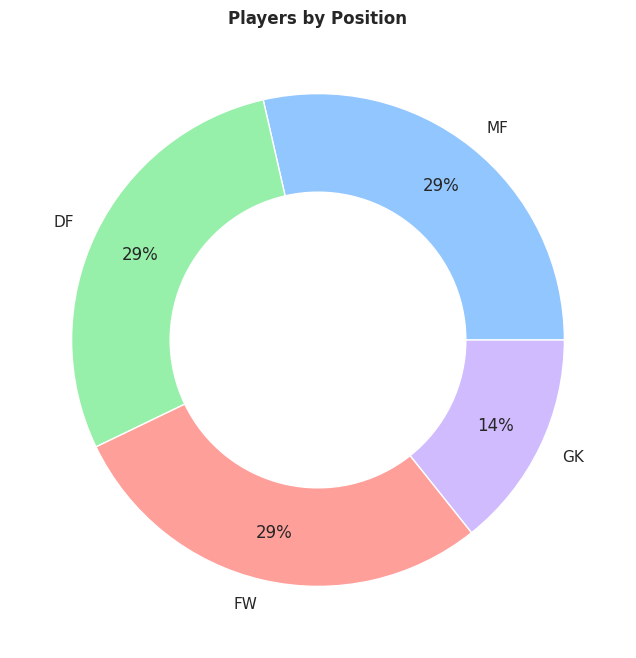

In [6]:
# Displaying players by position:
squad['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by Position', fontweight = 'bold')
plt.show()

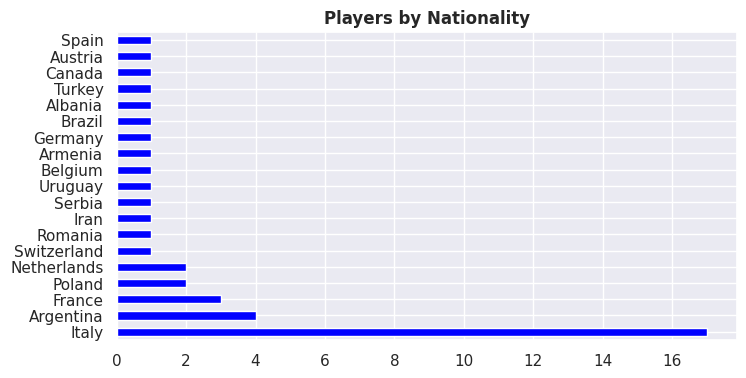

In [7]:
# Displaying players by nationality:
squad['Nationality'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Players by Nationality', fontweight = 'bold')
plt.show()

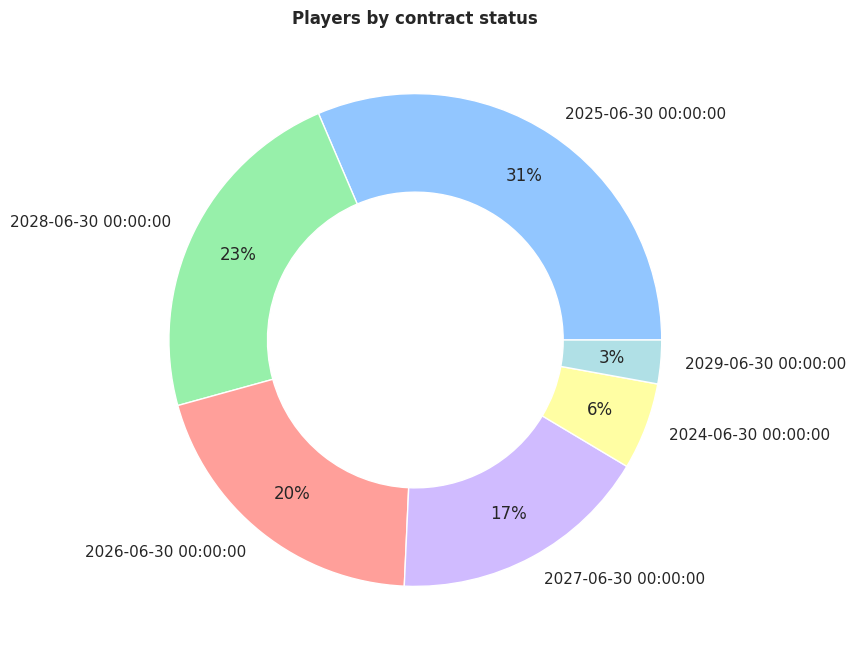

In [8]:
# Displaying players by contract status:
squad['Contract until'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by contract status', fontweight = 'bold')
plt.show()

In [9]:
# Creating a datetime object based on the dates from the dataset:
squad['Date of birth'] = squad['Date of birth'].map(pd.to_datetime)
squad['Birth year'] = squad['Date of birth'].apply(lambda x : x.year)

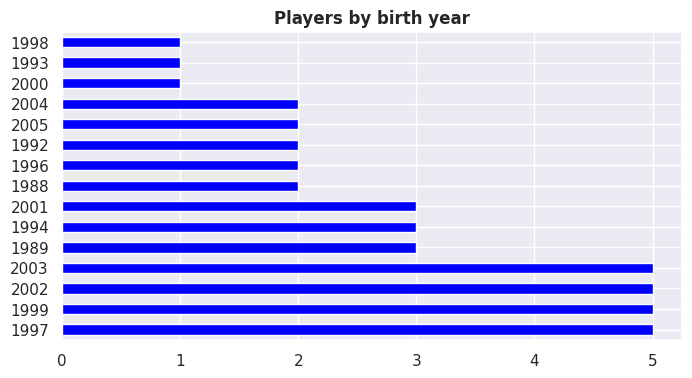

In [10]:
# Displaying players by birth year:
squad['Birth year'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Players by birth year', fontweight = 'bold')
plt.show()

In [11]:
now = date.today()
squad['Player age'] = squad.apply(lambda x: relativedelta(now, x['Date of birth']).years if x['Date of birth'] is not pd.NaT else pd.NaT, axis=1)
squad.tail(50)

,Number,Position,Nationality,Player,Contract until,Date of birth,Birth year,Player age
0,1,GK,Switzerland,Yann Sommer,2026-06-30,1988-12-17,1988,35
1,2,MF,Netherlands,Denzel Dumfries,2025-06-30,1996-04-18,1996,28
2,6,DF,Netherlands,Stefan de Vrij,2025-06-30,1992-02-05,1992,32
3,8,FW,Austria,Marko Arnautović,2025-06-30,1989-04-19,1989,35
4,9,FW,France,Marcus Thuram,2028-06-30,1997-08-06,1997,26
5,10,FW,Argentina,Lautaro Martínez,2026-06-30,1997-08-22,1997,26
6,15,DF,Italy,Francesco Acerbi,2025-06-30,1988-02-10,1988,36
7,16,MF,Italy,Davide Frattesi,2028-06-30,1999-09-22,1999,24
8,17,MF,Canada,Tajon Buchanan,2028-06-30,1999-02-08,1999,25
9,20,MF,Turkey,Hakan Çalhanoğlu,2027-06-30,1994-02-08,1994,30


In [12]:
# Displaying statistical data of the numerical data present in the dataset (after the creation of the 'Player age' column):
squad.describe()

,Contract until,Date of birth,Birth year,Player age
count,35,42,42.000000,42.000000
mean,2026-10-12 13:01:42.857142784,1998-06-06 13:08:34.285714304,1998.047619,25.619048
min,2024-06-30 00:00:00,1988-02-10 00:00:00,1988.000000,19.000000
25%,2025-06-30 00:00:00,1995-01-08 06:00:00,1994.500000,21.250000
50%,2026-06-30 00:00:00,1999-03-12 00:00:00,1999.000000,25.000000
75%,2027-12-30 00:00:00,2002-08-13 00:00:00,2002.000000,28.750000
max,2029-06-30 00:00:00,2005-06-28 00:00:00,2005.000000,36.000000
std,NaN,NaN,4.967958,4.878786


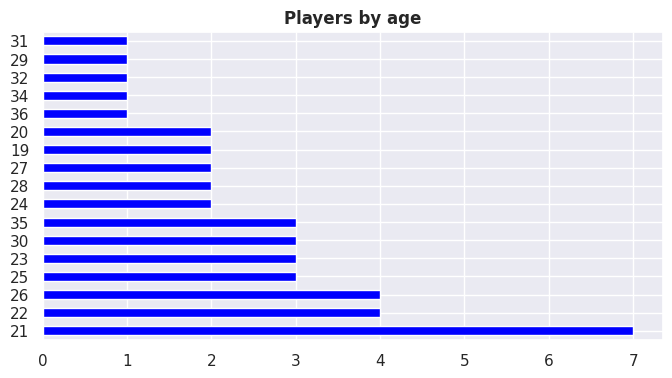

In [13]:
# Displaying players by age:
squad['Player age'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Players by age', fontweight = 'bold')
plt.show()

In [14]:
# Classifying Italian and Non Italian players under 23 years old:
def italian_players_u23(row):
  player = row['Player']
  age = row['Player age']
  nationality = row['Nationality']

  if age <= 23:
    if nationality == 'Italy':
      return 'Italian, U23'
    else:
      return 'Non Italian, older'
  else:
    return 'Older player'

# Applying the function above on a column of the dataset and generating a new column as result:
squad['U23 and Italian?'] = squad.apply(italian_players_u23, axis=1)
squad.tail()

,Number,Position,Nationality,Player,Contract until,Date of birth,Birth year,Player age,U23 and Italian?
37,—,GK,Serbia,Filip Stanković,2024-06-30,2002-02-25,2002,22,"Non Italian, older"
38,—,GK,Italy,William Rovida,2025-06-30,2003-03-14,2003,21,"Italian, U23"
39,NaN,MF,Poland,Piotr Zieliński,2028-06-30,1994-05-20,1994,30,Older player
40,NaN,FW,Iran,Mehdi Taremi,2026-06-30,1992-07-18,1992,31,Older player
41,NaN,GK,Spain,Josep Martínez,2029-06-30,1998-05-27,1998,26,Older player


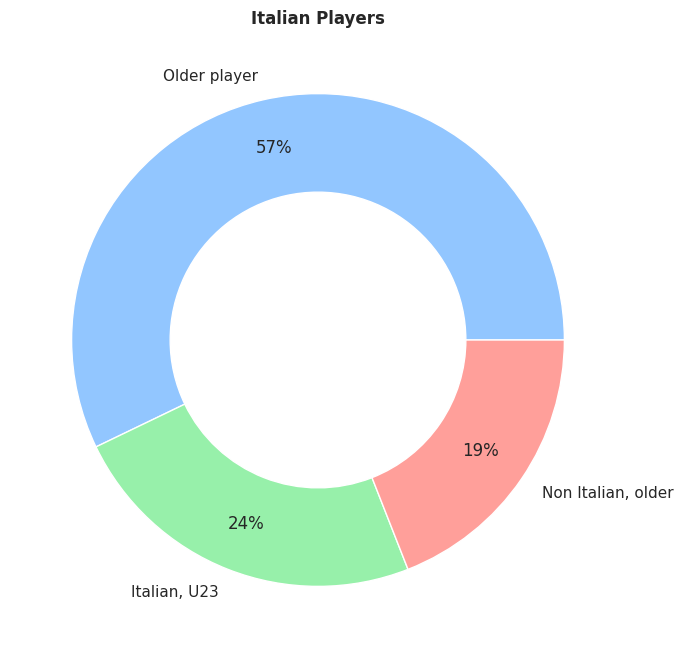

In [15]:
# Displaying italian players categorized:
squad['U23 and Italian?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Italian Players', fontweight = 'bold')
plt.show()